<a href="https://colab.research.google.com/github/alebaldion/challenge-Alura-Store/blob/main/FINAL__AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


#1. Análisis de facturación



In [2]:
# 1.1 Calcular Ingresos Totales:
ingresos_tienda1 = tienda1['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

print("📊 ANÁLISIS DE FACTURACIÓN 📊")
print("═" * 30)
print(f"Ingresos Tienda 1 : ${ingresos_tienda1:,.2f}")
print(f"Ingresos Tienda 2: ${ingresos_tienda2:,.2f}")
print(f"Ingresos Tienda 3: ${ingresos_tienda3:,.2f}")
print(f"Ingresos Tienda 4: ${ingresos_tienda4:,.2f}")

📊 ANÁLISIS DE FACTURACIÓN 📊
══════════════════════════════
Ingresos Tienda 1 : $1,150,880,400.00
Ingresos Tienda 2: $1,116,343,500.00
Ingresos Tienda 3: $1,098,019,600.00
Ingresos Tienda 4: $1,038,375,700.00


In [3]:
# 1.2 Comparación de las Tiendas:
ingresos_tiendas = {
    "Tienda 1": ingresos_tienda1,
    "Tienda 2": ingresos_tienda2,
    "Tienda 3": ingresos_tienda3,
    "Tienda 4": ingresos_tienda4
}

tienda_menos_ingresos = min(ingresos_tiendas, key=ingresos_tiendas.get)
print(f"\n⚠️ La tienda con MENOS ingresos es: {tienda_menos_ingresos} (${ingresos_tiendas[tienda_menos_ingresos]:,.2f})")


⚠️ La tienda con MENOS ingresos es: Tienda 4 ($1,038,375,700.00)


# 2. Ventas por categoría

In [4]:
# 2. Ventas por categoría

# 2.1 Verificar los datos (Siempre importante)
print("\n📦 VENTAS POR CATEGORÍA 📦")
print("═" * 30)
print("Columnas en Tienda 1:", tienda1.columns.tolist())

# 2.2 Calcular productos vendidos por categoría
resultados_ventas = {}
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    ventas_por_categoria = df['Categoría del Producto'].value_counts()
    resultados_ventas[f'Tienda{i}'] = ventas_por_categoria

# 2.3 Mostrar resultados consolidados
def crear_tabla_con_totales(resultados, titulo):
    df = pd.DataFrame(resultados).fillna(0)
    df['Total'] = df.sum(axis=1)  # Total por categoría
    df.loc['Total Tienda'] = df.sum()  # Total por tienda
    print(f"\n{titulo}")
    print("═" * 50)
    print(df)
    return df

df_ventas = crear_tabla_con_totales(resultados_ventas, "📦 PRODUCTOS VENDIDOS POR CATEGORÍA")

# 2.4 Análisis rápido
print("\n🔝 TOP 3 CATEGORÍAS MÁS POPULARES POR TIENDA")
print("═" * 50)

resultados_ingresos = {}
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    ingresos_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    resultados_ingresos[f'Tienda{i}'] = ingresos_por_categoria

for tienda in resultados_ventas.keys():
    top_categorias = resultados_ventas[tienda].nlargest(3)
    print(f"\n🏷️ {tienda}:")
    for categoria, cantidad in top_categorias.items():
        ingresos = resultados_ingresos[tienda].get(categoria, 0)
        print(f"  - {categoria}: {cantidad} productos (${ingresos:,.2f} ingresos)")

print("\n🌟 CATEGORÍA MÁS POPULAR GLOBAL:")
df_ventas_sin_totales = df_ventas.drop(index='Total Tienda', errors='ignore')  # Eliminamos fila de totales
categoria_global = df_ventas_sin_totales['Total'].idxmax()  # Método más seguro
total_global = df_ventas_sin_totales['Total'].max()
print(f"  '{categoria_global}' con {total_global} productos vendidos en total")


📦 VENTAS POR CATEGORÍA 📦
══════════════════════════════
Columnas en Tienda 1: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']

📦 PRODUCTOS VENDIDOS POR CATEGORÍA
══════════════════════════════════════════════════
                         Tienda1  Tienda2  Tienda3  Tienda4  Total
Categoría del Producto                                            
Artículos para el hogar      171      181      177      201    730
Deportes y diversión         284      275      277      277   1113
Electrodomésticos            312      305      278      254   1149
Electrónicos                 448      422      451      451   1772
Instrumentos musicales       182      224      177      170    753
Juguetes                     324      313      315      338   1290
Libros                       173      197      185      187    742
Muebles                      465      442   

# 3. Calificación promedio de la tienda


In [5]:
# 3. Calificación promedio de la tienda

# 3.1  Calcular Promedios
promedio_calificaciones = {}

for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    if 'Calificación' in df.columns:
        promedio = df['Calificación'].mean()
        promedio_calificaciones[f'Tienda{i}'] = round(promedio, 2)
    else:
        promedio_calificaciones[f'Tienda{i}'] = "No disponible"

# Mostrar resultados
print("\n⭐ CALIFICACIONES PROMEDIO POR TIENDA ⭐")
print("═" * 40)
for tienda, calificacion in promedio_calificaciones.items():
    print(f"{tienda}: {calificacion} (sobre 5.0)")

# 3.2 Análisis de Resultados
if all(isinstance(v, (int, float)) for v in promedio_calificaciones.values()):
    mejor_tienda = max(promedio_calificaciones, key=promedio_calificaciones.get)
    print(f"\n🏆 La tienda con mejor satisfacción es: {mejor_tienda} ({promedio_calificaciones[mejor_tienda]}/5.0)")

if all(isinstance(v, (int, float)) for v in promedio_calificaciones.values()):
    peor_tienda = min(promedio_calificaciones, key=promedio_calificaciones.get)
    print(f"⚠️ La tienda con menor satisfacción es: {peor_tienda} ({promedio_calificaciones[peor_tienda]}/5.0)")



⭐ CALIFICACIONES PROMEDIO POR TIENDA ⭐
════════════════════════════════════════
Tienda1: 3.98 (sobre 5.0)
Tienda2: 4.04 (sobre 5.0)
Tienda3: 4.05 (sobre 5.0)
Tienda4: 4.0 (sobre 5.0)

🏆 La tienda con mejor satisfacción es: Tienda3 (4.05/5.0)
⚠️ La tienda con menor satisfacción es: Tienda1 (3.98/5.0)


# 4. Productos más y menos vendidos


📈 ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS 📉
══════════════════════════════════════════════════


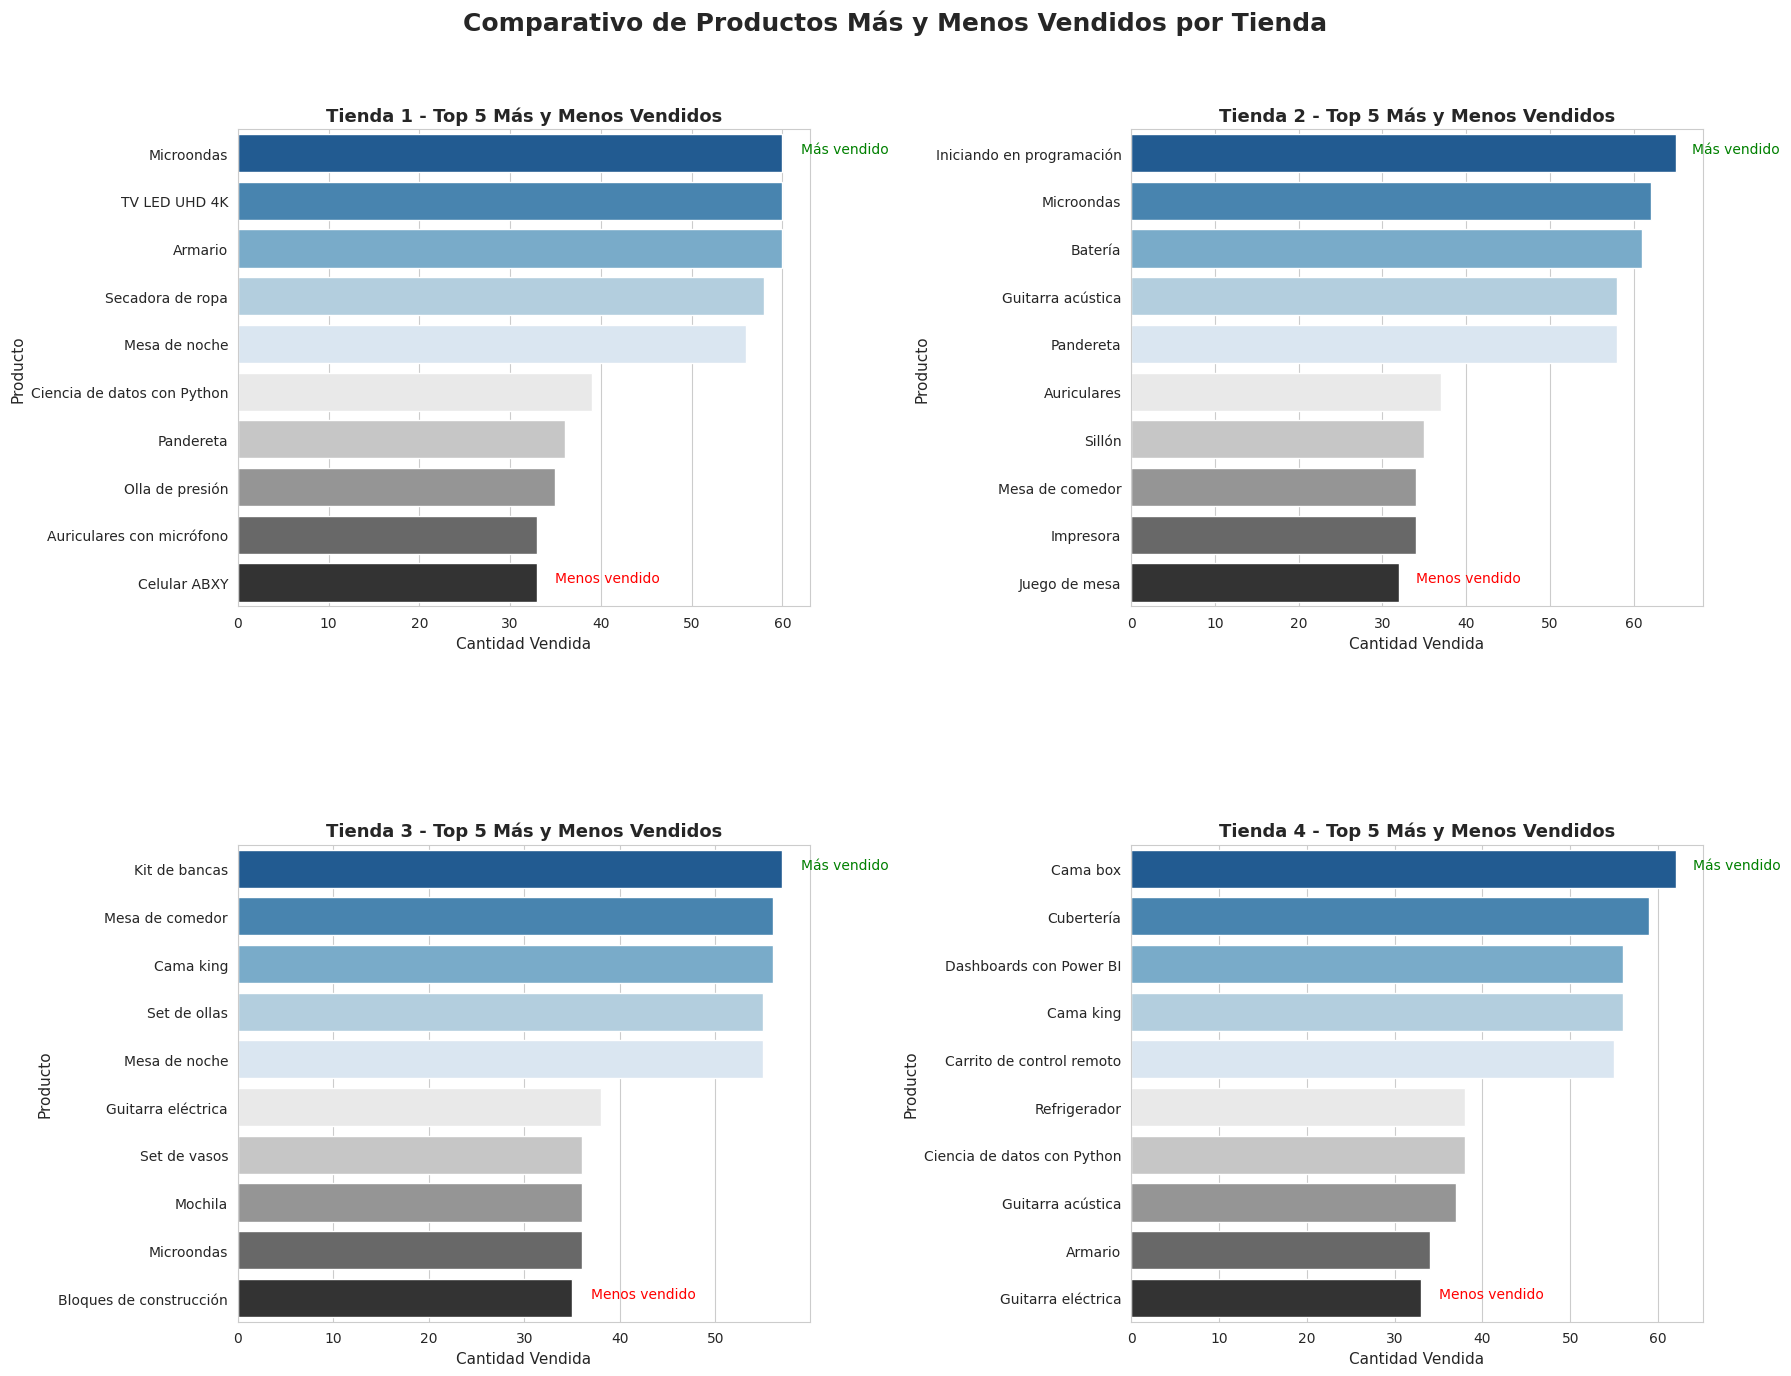

In [6]:
# 4. Productos más y menos vendidos

# Estilo general
sns.set_style("whitegrid")
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 11

# Tiendas y nombres
tiendas_df = [tienda1, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Paletas de colores
colores_top = sns.color_palette("Blues_r", 5)
colores_bottom = sns.color_palette("Greys", 5)

# Crear figura
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
axs = axs.flatten()

print("\n📈 ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS 📉")
print("═" * 50)

for i, (df, nombre) in enumerate(zip(tiendas_df, nombres)):
    conteo = df['Producto'].value_counts()
    top_5 = conteo.head(5)
    bottom_5 = conteo.tail(5)

    # Combinar en DataFrame
    df_combinado = pd.concat([top_5, bottom_5])
    productos = df_combinado.index
    cantidades = df_combinado.values

    # Crear DataFrame auxiliar para hue
    datos = pd.DataFrame({
        'Producto': productos,
        'Cantidad': cantidades,
        'Grupo': ['Más Vendido'] * 5 + ['Menos Vendido'] * 5
    })

    # Combinar colores
    colores = list(colores_top) + list(colores_bottom)
    color_dict = dict(zip(productos, colores))

    # Gráfico
    sns.barplot(
        data=datos,
        x='Cantidad',
        y='Producto',
        hue='Producto',
        palette=color_dict,
        legend=False,
        ax=axs[i]
    )

    # Títulos
    axs[i].set_title(f"{nombre} - Top 5 Más y Menos Vendidos")
    axs[i].set_xlabel("Cantidad Vendida")
    axs[i].set_ylabel("Producto")

    # Anotaciones: Sin emojis para evitar errores de fuente
    if not top_5.empty:
        producto_mas_vendido = top_5.index[0]
        axs[i].annotate("Más vendido",
                        xy=(top_5.values[0], producto_mas_vendido),
                        xytext=(top_5.values[0] + 2, producto_mas_vendido),
                        arrowprops=dict(facecolor='green', arrowstyle="->"),
                        fontsize=10, color='green')

    if not bottom_5.empty:
        producto_menos_vendido = bottom_5.index[-1]
        axs[i].annotate("Menos vendido",
                        xy=(bottom_5.values[-1], producto_menos_vendido),
                        xytext=(bottom_5.values[-1] + 2, producto_menos_vendido),
                        arrowprops=dict(facecolor='red', arrowstyle="->"),
                        fontsize=10, color='red')

# Título principal
plt.suptitle("Comparativo de Productos Más y Menos Vendidos por Tienda", fontsize=18, fontweight='bold')

# Ajustes de espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.5)  # espacio vertical entre filas

plt.show()

# 5. Envío promedio por tienda

In [7]:
# 5. Envío promedio por tienda

# Crear un diccionario con los nombres y DataFrames
tiendas_envio = {
    '🏷️Tienda 1': tienda1,
    '🏷️Tienda 2': tienda2,
    '🏷️Tienda 3': tienda3,
    '🏷️Tienda 4': tienda4
}

# Calcular el costo de envío promedio por tienda
costos_envio_promedio = {}

print("\n🚚 COSTO DE ENVÍO PROMEDIO POR TIENDA 🚚")
print("═" * 40)
for nombre, df in tiendas_envio.items():
    if 'Costo de envío' in df.columns:
        promedio = df['Costo de envío'].mean()
        costos_envio_promedio[nombre] = promedio
        print(f"{nombre}: ${promedio:.2f} en promedio de costo de envío")
    else:
        print(f"{nombre}: La información del costo de envío no está disponible.")



🚚 COSTO DE ENVÍO PROMEDIO POR TIENDA 🚚
════════════════════════════════════════
🏷️Tienda 1: $26018.61 en promedio de costo de envío
🏷️Tienda 2: $25216.24 en promedio de costo de envío
🏷️Tienda 3: $24805.68 en promedio de costo de envío
🏷️Tienda 4: $23459.46 en promedio de costo de envío


# 6. GRÁFICOS


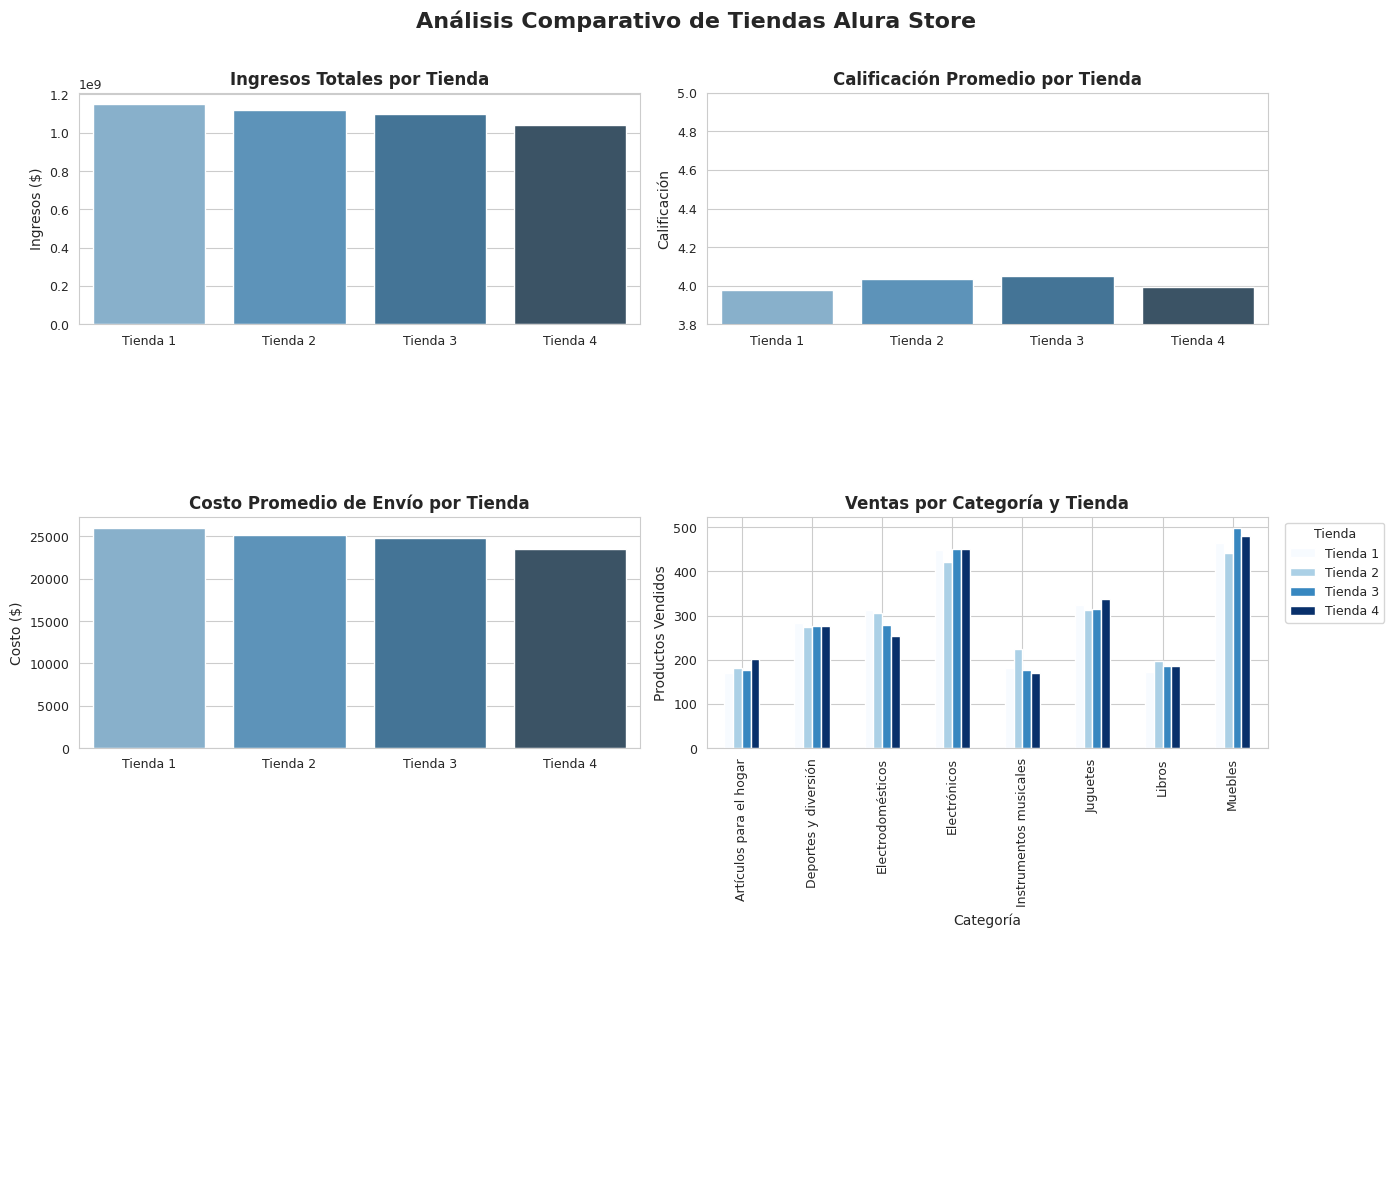

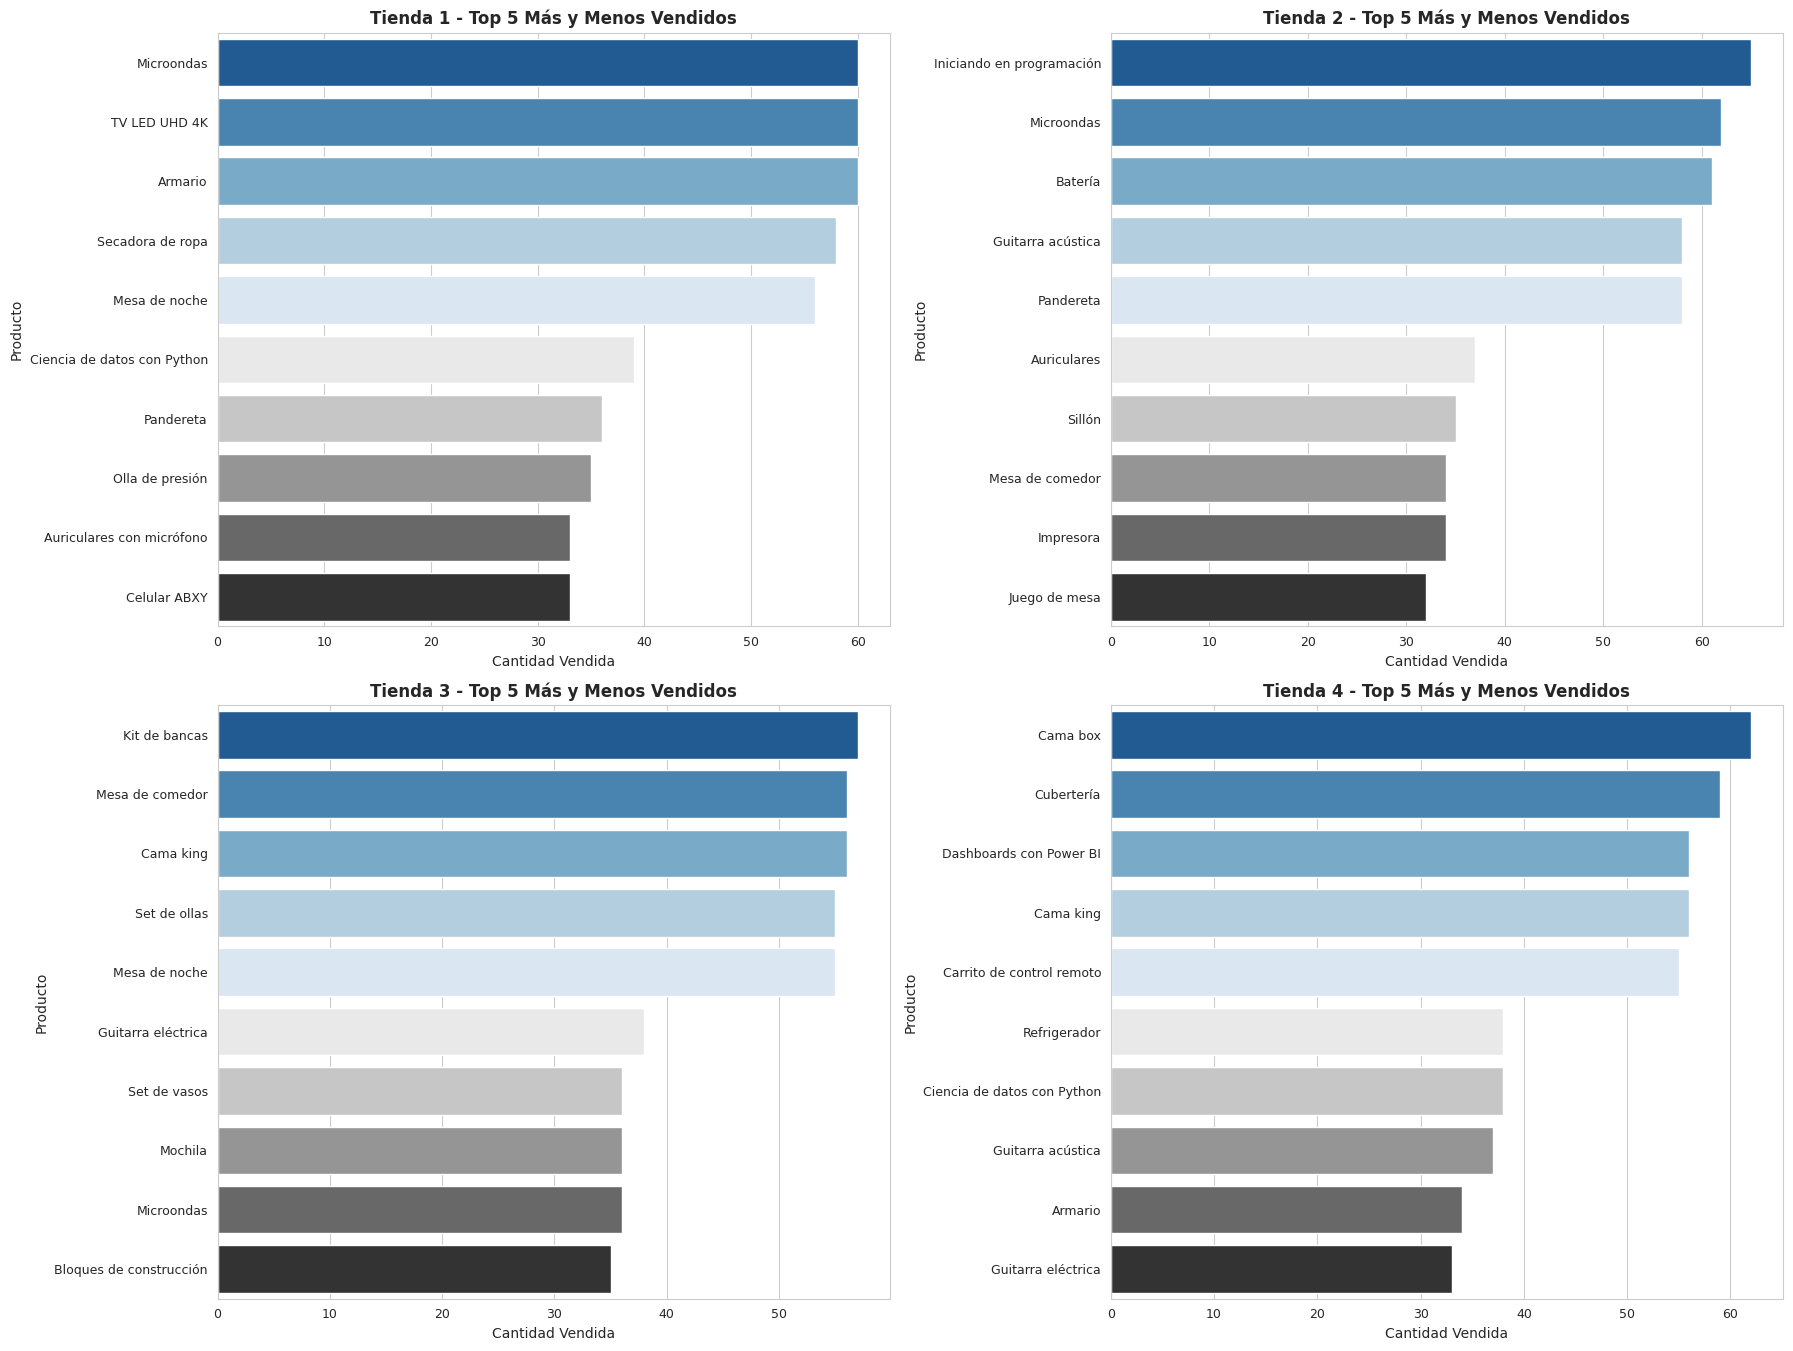

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURACIÓN DE ESTILO ---
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 9, 'axes.titlesize': 12, 'axes.labelsize': 10})

# --- IMPORTACIÓN DE DATOS ---
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tiendas_dfs = [pd.read_csv(url) for url in [url1, url2, url3, url4]]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# --- CÁLCULO DE MÉTRICAS ---
ingresos = [df['Precio'].sum() for df in tiendas_dfs]
calificaciones = [df['Calificación'].mean() for df in tiendas_dfs]
envios = [df['Costo de envío'].mean() for df in tiendas_dfs]

# Ventas por categoría
ventas_categorias = {nombre: df['Categoría del Producto'].value_counts() for nombre, df in zip(nombres_tiendas, tiendas_dfs)}
df_categorias = pd.DataFrame(ventas_categorias).fillna(0)

# --- FIGURA PRINCIPAL ---
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Análisis Comparativo de Tiendas Alura Store", fontsize=16, weight='bold')
palette = sns.color_palette("Blues_d", 4)

# Ingresos
sns.barplot(x=nombres_tiendas, y=ingresos, hue=nombres_tiendas, ax=axs[0, 0], palette=palette, legend=False)
axs[0, 0].set_title("Ingresos Totales por Tienda")
axs[0, 0].set_ylabel("Ingresos ($)")

# Calificaciones
sns.barplot(x=nombres_tiendas, y=calificaciones, hue=nombres_tiendas, ax=axs[0, 1], palette=palette, legend=False)
axs[0, 1].set_title("Calificación Promedio por Tienda")
axs[0, 1].set_ylabel("Calificación")
axs[0, 1].set_ylim(3.8, 5)

# Envíos
sns.barplot(x=nombres_tiendas, y=envios, hue=nombres_tiendas, ax=axs[1, 0], palette=palette, legend=False)
axs[1, 0].set_title("Costo Promedio de Envío por Tienda")
axs[1, 0].set_ylabel("Costo ($)")


# Ventas por categoría
df_categorias.plot(kind='bar', ax=axs[1, 1], colormap='Blues')
axs[1, 1].set_title("Ventas por Categoría y Tienda")
axs[1, 1].set_ylabel("Productos Vendidos")
axs[1, 1].legend(title='Tienda', bbox_to_anchor=(1.02, 1), loc='upper left')
axs[1, 1].set_xlabel("Categoría")

# Ocultar ejes vacíos
axs[2, 0].axis('off')
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# --- TOP PRODUCTOS MÁS Y MENOS VENDIDOS ---
fig2, axs2 = plt.subplots(2, 2, figsize=(18, 14))
axs2 = axs2.flatten()
colores_top = sns.color_palette("Blues_r", 5)
colores_bottom = sns.color_palette("Greys", 5)

for i, (df, nombre) in enumerate(zip(tiendas_dfs, nombres_tiendas)):
    conteo = df['Producto'].value_counts()
    top_5 = conteo.head(5)
    bottom_5 = conteo.tail(5)

    productos = list(top_5.index) + list(bottom_5.index)
    cantidades = list(top_5.values) + list(bottom_5.values)
    grupos = ['Más Vendido'] * 5 + ['Menos Vendido'] * 5
    colores = list(colores_top) + list(colores_bottom)

    datos = pd.DataFrame({
        'Producto': productos,
        'Cantidad': cantidades,
        'Grupo': grupos
    })

    color_dict = dict(zip(productos, colores))

    sns.barplot(
        data=datos,
        x='Cantidad',
        y='Producto',
        hue='Producto',
        palette=color_dict,
        legend=False,
        ax=axs2[i]
    )

    axs2[i].set_title(f"{nombre} - Top 5 Más y Menos Vendidos")
    axs2[i].set_xlabel("Cantidad Vendida")
    axs2[i].set_ylabel("Producto")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# PARTICIPACIÓN EN DESEMPEÑO GENERAL POR TIENDA

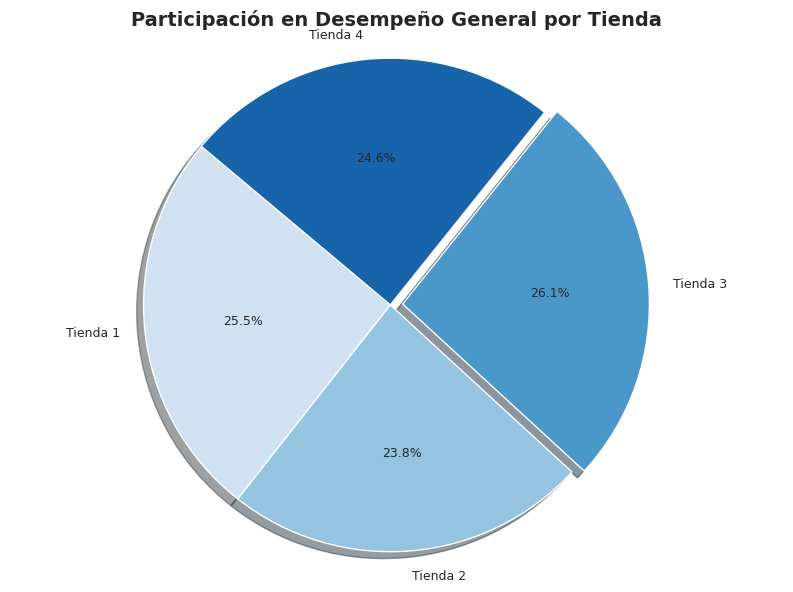

In [ ]:
import matplotlib.pyplot as plt

# Puntuación general estimada (0-100) basada en el análisis de fortalezas y debilidades
puntaje_tiendas = {
    'Tienda 1': 88,   # Alto ingreso, pero menor calificación
    'Tienda 2': 82,   # Balanceada, sin destacar mucho
    'Tienda 3': 90,   # Mejor calificación, buen balance en productos
    'Tienda 4': 85    # Fuerte en categorías y productos, pero menor ingreso
}

labels = puntaje_tiendas.keys()
sizes = puntaje_tiendas.values()
colors = sns.color_palette("Blues", len(puntaje_tiendas))

explode = [0.05 if score == max(sizes) else 0 for score in sizes]  # Destacar la mejor tienda

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=140, wedgeprops={'edgecolor': 'white'})

plt.title("Participación en Desempeño General por Tienda", fontsize=14, weight='bold')
plt.axis('equal')  # Para que la torta sea perfectamente circular
plt.tight_layout()
plt.show()




#7. Informe de Análisis de Datos para la Toma de Decisión Estratégica

 **¿Qué tienda debería vender el Sr. Juan para iniciar un nuevo emprendimiento?**


---



**1. PROPÓSITO**

Este informe tiene como propósito presentar un análisis integral de las cuatro tiendas de la cadena Alura Store con el objetivo de asesorar al Sr. Juan en la toma de decisión sobre cuál de ellas debería vender para financiar un nuevo emprendimiento. La audiencia principal de este informe es el propio Sr. Juan, así como posibles socios estratégicos o asesores involucrados en la gestión de Alura Store.

**2. PRINCIPALES HALLAZGOS**
* La tienda con menores ingresos totales es la Tienda 4, con $1,038,375,700.

* LaTienda 3 obtiene la mejor cali ficación promedio de clientes (4.05/5.0).

* La categoría más popular globalmente es Muebles, siendo consistentemente la más vendida en todas las tiendas.

* La Tienda 1 presenta la calificación de cliente más baja (3.98/5.0) y el mayor costo de envío promedio.

* La Tienda 4, a pesar de su bajo desempeño en ingresos, presenta el menor costo de envío promedio.


**3. MÉTODOS Y DATOS**

Los datos analizados provienen de las ventas y operaciones de las cuatro tiendas de la cadena, incluyendo:

* Ingresos totales por tienda.

* Volumen de ventas por categoría de producto.

* Productos más y menos vendidos.

* Calificaciones promedio de los clientes.

* Costos promedio de envío.

Se realizó un análisis comparativo entre tiendas, utilizando métricas cuantitativas y cualitativas para identificar fortalezas y debilidades relativas.

**4.RESULTADOS**

*Ingresos Totales por Tienda*

* Tienda 1: $1,150,880,400

* Tienda 2: $1,116,343,500

* Tienda 3: $1,098,019,600

* Tienda 4: $1,038,375,700 (la más baja)

*Ventas por Categoría de Producto*

* Muebles, Electrónicos y Juguetes dominan en todas las tiendas.

*La tienda con mayor volumen en “Muebles” es Tienda 3 (499 unidades vendidas), seguida de Tienda 4 (480).*

*Calificaciones Promedio*

* Tienda 3: 4.05 ⭐️

* Tienda 2: 4.04

* Tienda 4: 4.00

* Tienda 1: 3.98 (la más baja)

*Costo de Envío Promedio*

* Tienda 1: $26,018.61

* Tienda 2: $25,216.24

* Tienda 3: $24,805.68

* Tienda 4: $23,459.46 (el más bajo)

*Fortalezas y Debilidades por Tienda*


* Tienda 1	Mayor ingreso total	Peor calificación, mayor costo de envío
* Tienda 2	Buen balance entre ingreso y calificación	Ningún liderazgo claro
* Tienda 3	Mejor calificación, liderazgo en muebles	Ingresos bajos comparado con Tienda 1
* Tienda 4	Bajo costo de envío, buena venta de juguetes	Peores ingresos totales

**5. CONCLUSIONES Y RECOMENDACIONES**

Aunque la Tienda 4 tiene algunas fortalezas, como su bajo costo de envío y calificaciones aceptables, su rendimiento financiero es claramente el más bajo en términos de ingresos totales. Además, no lidera en ninguna categoría de productos clave ni en satisfacción del cliente.

Por tanto, recomendamos vender la Tienda 4. Esta decisión minimizaría el impacto negativo sobre la rentabilidad general de la cadena y liberaría capital para el nuevo emprendimiento del Sr. Juan sin comprometer los activos más valiosos del negocio.

**6.OTRAS CONSIDERACIONES**

Vender una tienda con el menor impacto financiero y sin liderazgo competitivo es la decisión más estratégica.

Las tiendas 1, 2 y 3 tienen elementos diferenciadores que las hacen valiosas y competitivas en el mercado.

Tienda 4, aunque funcional, no presenta un desempeño sobresaliente en ninguna de las métricas clave.

El bajo costo de envío de Tienda 4 puede ser un atractivo para compradores potenciales, lo cual podría facilitar su venta.